In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from math import pi,cos,sin

In [9]:
#les différentes définition utiliser au cours du code
def incertitude(data):
    
    """ retourne la variance, l'ecart type et la moyenne 
        data = liste de donnée
    """
    moy = np.average(data)
    var = np.var(data)
    sig = var**2
    ecart = np.std(data, ddof=0)   #largeur de l'histograme

    return(np.round(moy,5),ecart), moy, ecart

#Équation pour déterminer la longueur d'onde en fonction de la distance
def N(d,a):
    """
        retourne le nombre de frange
        a = longueur d'onde 
        d = déplacement du mirroire 2 
        a et b doivent avoir les mêmes unité 
    """
    return d*2/a

# équation pour déterminé la différence de longueur d'onde des doublet jaune de la lampe de sodium
def delta_l(l_avg,delta_d):
    
    """ retoune la différence de longueur d'onde
        l_avg = longeur d'onde moyenne
        delta_d = d/placement du mirroir 2 
        L_avg et delta_d doivent avoir les mêmes unité
    """  
    
    delta_l = (l_avg**2)/(2*delta_d)
    return delta_l

def incer_propagation_delta_lambda(sigma_lambda,sigma_d,lambda_,d,val_):
    """ retourne la propagation des incertitudes pour une fonction de type : ax^2/y sans covariance 

    """
    sigma_tot = val_*np.sqrt(  (2*sigma_lambda/lambda_)**2 + (sigma_d/d)**2 )
    return sigma_tot

Données expérimentale la longueur d'onde des différentes lampes:
λ Hg = ( 555.0 ± 6.0 )nm
λ Na = ( 592.0 ± 5.0 )nm
λ K = ( 754.0 ± 8.0 )nm


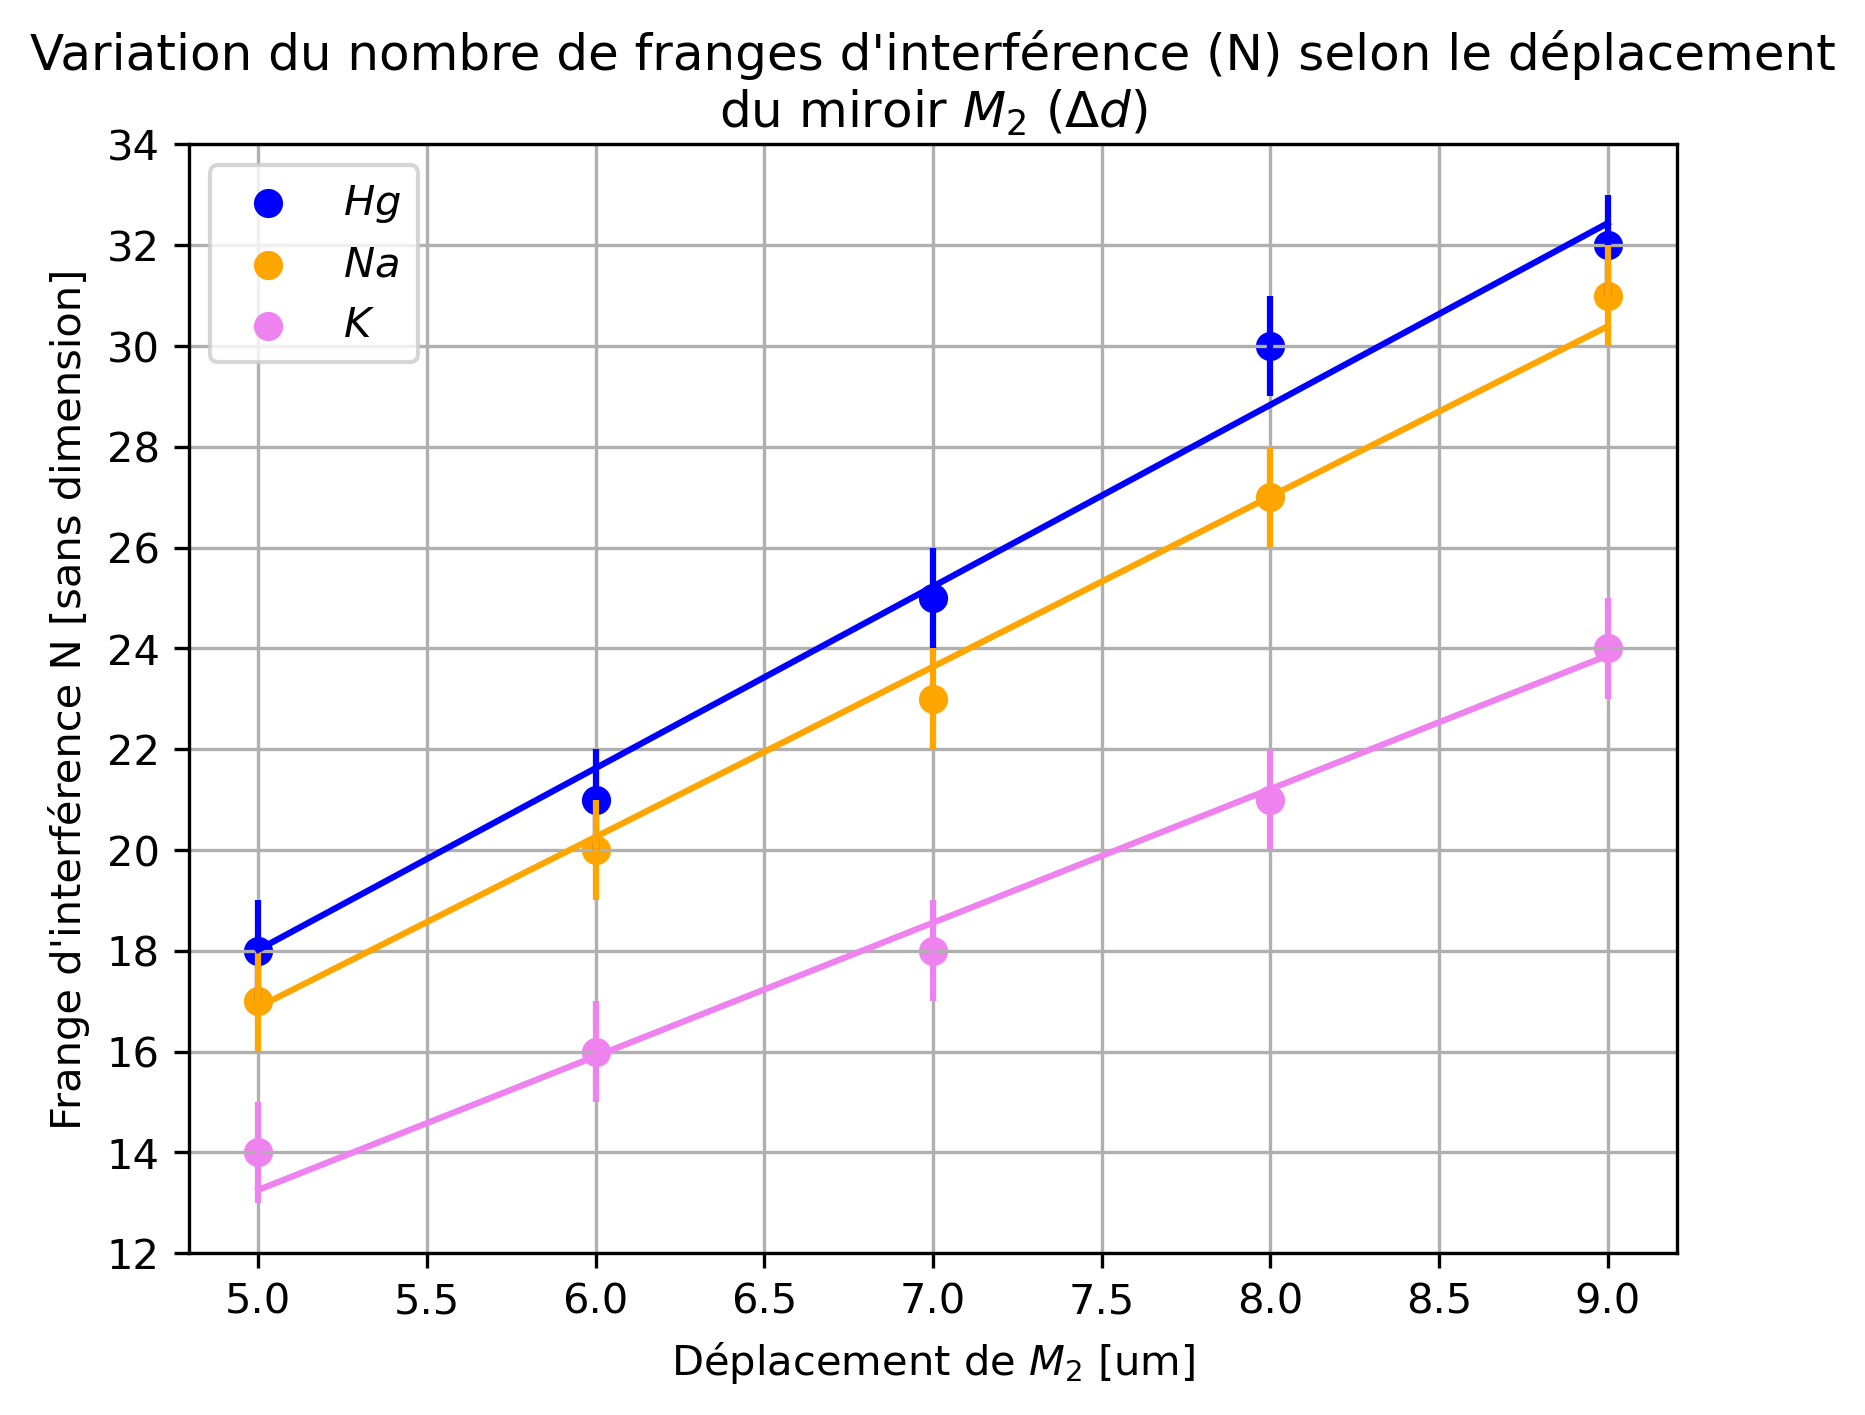

In [7]:
mm2nm = 1e-6 #nm an mm
mm2um =1000
nm2m = 1e9
h = 4.135667696e-15 # ev/s cst de planck 
c = 299792458 # vitesse lumière en nm/s 

#donné receuillie pour déterminer la longueur d'onde de la lampe au mercue, sodium et potassium (extra)

delta_d = np.array([0,0.005,0.006,0.007,0.008,0.009])*mm2um
Hg_N = np.array([0,18,21,25,30,32])
Na_N = np.array([0,17,20,23,27,31])
K_N = np.array([0,14,16,18,21,24])

#error déterminé
error_d = np.ones(5)*0.005
error_N = np.ones(5)

# figure parametre
plt.figure(1,dpi=300)
plt.title(r"Variation du nombre de franges d'interférence (N) selon le déplacement du miroir ${M}_{2}$ ($\Delta d$)", wrap =True)
plt.ylabel("Frange d'interférence N [sans dimension]")
plt.xlabel(r'Déplacement de ${M}_{2}$ [um]')
plt.yticks(np.arange(10, 40, 2)) 
plt.grid()


#mise en forme des donné receuillie
plt.scatter(delta_d[1::],Hg_N[1::], c ='b', label = r'$Hg$')
plt.scatter(delta_d[1::],Na_N[1::], c ='orange', label = r'$Na$')
plt.scatter(delta_d[1::],K_N[1::], c ='violet', label = r'$K$')


#barre d'erreur
plt.errorbar(delta_d[1::],Hg_N[1::],xerr = error_d,yerr = error_N,fmt='none', c ='b')
plt.errorbar(delta_d[1::],Na_N[1::],xerr = error_d,yerr= error_N, fmt='none', c = 'orange')
plt.errorbar(delta_d[1::],K_N[1::],xerr = error_d,yerr= error_N, fmt='none', c = 'violet')


# curve fit avec l'équation théorique
popt_Hg, pcov_Hg = curve_fit(N,delta_d,Hg_N)
popt_Na, pcov_Na = curve_fit(N,delta_d,Na_N)
popt_K, pcov_K = curve_fit(N,delta_d,K_N)

#incertitude retourné par curve_fit
incer_Hg = np.sqrt(np.diag(pcov_Hg))
incer_Na = np.sqrt(np.diag(pcov_Na))
incer_K = np.sqrt(np.diag(pcov_K))


x = np.linspace(0.005*mm2um,0.009*mm2um,2000)
plt.plot(x,N(x,popt_Hg), c = 'b')
plt.plot(x,N(x,popt_Na), c ='orange')
plt.plot(x,N(x,popt_K), c ='violet')

l_Na = np.round(popt_Na[0]*1000,0)
incer_lNa = np.round(incer_Na[0]*1000,0)

l_Hg = popt_Hg[0]*1000 #longueur d'onde en nm
l_k = popt_K[0]*1000 # longueur d'onde en nm

E_na = h*c/(l_Na*nm2m)
E_Hg = h*c/(l_k*nm2m)


plt.legend()

print("Données expérimentale la longueur d'onde des différentes lampes:")
print('λ Hg = (',np.round(popt_Hg[0]*1000,0),'±', np.round(incer_Hg[0]*1000,0),')nm')
print('λ Na = (',l_Na,'±',incer_lNa,')nm')
print('λ K = (',np.round(popt_K[0]*1000,0),'±', np.round(incer_K[0]*1000,0),')nm')
plt.savefig('lambda_lampe.png')

In [29]:
# lambda entre les deux doublet jaune de la lampe de sodium 
av = 589.3

#donnée receuillie
d_i = np.array([9.99,9.79975,9.99,9.69962,9.38992]) #position initial mm
d_f = np.array([9.776,9.509,9.700,9.390,9.10]) #position final mm
delta_d = d_i-d_f

dmax_moy1,dmax_moy, incer_dmax= incertitude(delta_d) #mm
l_moy, incer_lmoy = l_Na, incer_lNa #nm


diff_lambda = delta_l(l_moy,dmax_moy)*mm2nm # différence de longueur d'onde entre le double jaune


#propagation des incertitudes. 
incer_difflambda = np.round(incer_propagation_delta_lambda(incer_lmoy,incer_dmax,l_moy,dmax_moy,diff_lambda),2)

print("La différence de l'ongeur expérimentale d'onde entre les deux doublets jaune de la lampe de sodium est de : (", np.round(diff_lambda,2),'±', incer_difflambda,")nm")



La différence de l'ongeur expérimentale d'onde entre les deux doublets jaune de la lampe de sodium est de : ( 0.63 ± 0.08 )nm


In [48]:
#consonance disonance
N_He = np.array([9,10,9,9,8])
n_He = N_He*632/(2*79.5*mm2nm) +1
moy_He, var_He, ecart_He = incertitude(n_He)

In [48]:
#consonance disonance
N_He = np.array([9,10,9,9,8])
n_He = N_He*632/(2*79.5*mm2nm) +1

In [49]:
N_air = np.array([56,57,58,57,58])
n_air = (N_air*632)/(2*79.5*mm2nm) +1

In [50]:
N_SF6 = np.array([200,212,207,182,214,209])
n_SF6 = (N_SF6*632/(2*79.5*mm2nm))+1
